Step 1: Import Libraries

Start by importing the necessary libraries for data manipulation, visualization, natural language processing and machine learning.

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer

Step 2: Load and Explore Data

Load your dataset containing house features and prices using Pandas and explore it through Exploratory Data Analysis (EDA).

In [2]:
# Load Dataset
df = pd.read_csv('amazon_alexa.tsv', delimiter='\t')

In [3]:
# Display the First few Rows of Dataset
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
# Check Missing Values
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [5]:
# Get Information about the Dataset, Missing Values and Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


Step 3: Data Preprocessing and Feature Engineering

Based on the insights from EDA, perform data preprocessing and feature engineering to prepare the data for Random Forest Classifier.

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Name: variation, dtype: int64
Index(['Black  Dot', 'Charcoal Fabric ', 'Configuration: Fire TV Stick',
       'Black  Plus', 'Black  Show'],
      dtype='object')


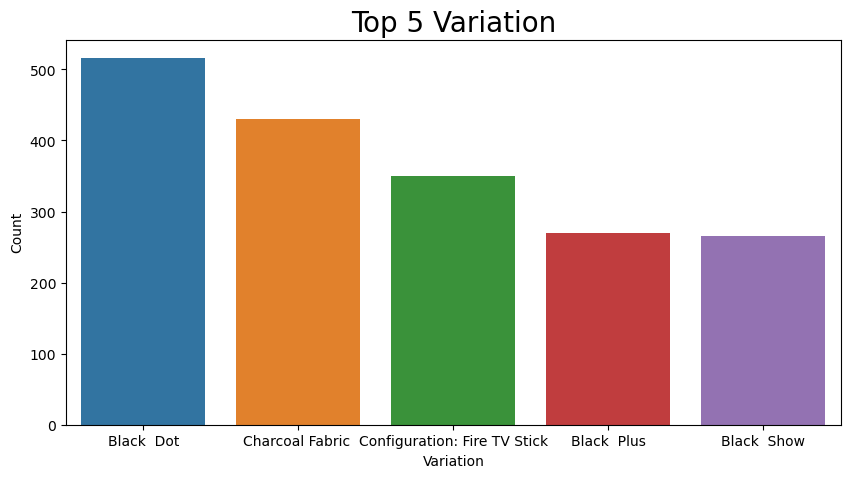

In [6]:
# value counts of variation 
variation_label = df.variation.value_counts()[:5]
print(variation_label)
index=variation_label.index
print(index)

# plotting top 5 variation
plt.figure(figsize=(10, 5))
sns.barplot(y=variation_label,x=index);
plt.xlabel('Variation')
plt.ylabel('Count')
plt.title('Top 5 Variation', fontsize=20);

In [7]:
# shape of data
df.shape

(3150, 5)

In [8]:
# adding a len column for analyzing the length of the reviews
df['len'] = df['verified_reviews'].map(len)
df['len']

0        13
1         9
2       195
3       172
4         5
       ... 
3145     50
3146    135
3147    441
3148    380
3149      4
Name: len, Length: 3150, dtype: int64

In [9]:
# displaying data based on len
df.groupby('len').describe().head(10)

rating                                              feedback            \
     count      mean       std  min  25%  50%  75%  max    count      mean   
len                                                                          
1     81.0  3.716049  1.575076  1.0  3.0  5.0  5.0  5.0     81.0  0.765432   
2      4.0  5.000000  0.000000  5.0  5.0  5.0  5.0  5.0      4.0  1.000000   
3      3.0  4.000000  1.732051  2.0  3.5  5.0  5.0  5.0      3.0  0.666667   
4     15.0  4.600000  0.828079  2.0  4.5  5.0  5.0  5.0     15.0  0.933333   
5     17.0  4.823529  0.392953  4.0  5.0  5.0  5.0  5.0     17.0  1.000000   
6      5.0  4.600000  0.547723  4.0  4.0  5.0  5.0  5.0      5.0  1.000000   
7     33.0  4.878788  0.331434  4.0  5.0  5.0  5.0  5.0     33.0  1.000000   
8     41.0  4.853659  0.357839  4.0  5.0  5.0  5.0  5.0     41.0  1.000000   
9     21.0  4.857143  0.358569  4.0  5.0  5.0  5.0  5.0     21.0  1.000000   
10    36.0  4.833333  0.696932  1.0  5.0  5.0  5.0  5.0     36.0  0.972222   

                                        
          std  min  25%  50%  75%  max  
len                                     
1    0.426369  0.0  1.0  1.0  1.0  1.0  
2    0.000000  1.0  1.0  1.0  1.0  1.0  
3    0.577350  0.0  0.5  1.0  1.0  1.0  
4    0.258199  0.0  1.0  1.0  1.0  1.0  
5    0.000000  1.0  1.0  1.0  1.0  1.0  
6    0.000000  1.0  1.0  1.0  1.0  1.0  
7    0.000000  1.0  1.0  1.0  1.0  1.0  
8    0.000000  1.0  1.0  1.0  1.0  1.0  
9    0.000000  1.0  1.0  1.0  1.0  1.0  
10   0.166667  0.0  1.0  1.0  1.0  1.0

In [10]:
# displaying the data according to the Ratings
df.groupby('rating').describe()

feedback                                        len              \
          count mean  std  min  25%  50%  75%  max   count        mean   
rating                                                                   
1         161.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   161.0  195.000000   
2          96.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    96.0  249.187500   
3         152.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   152.0  207.296053   
4         455.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   455.0  178.520879   
5        2286.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  2286.0  108.444007   

                                                       
               std  min    25%    50%     75%     max  
rating                                                 
1       212.371226  1.0  36.00  120.0  284.00  1124.0  
2       269.595303  1.0  78.75  163.0  309.25  1686.0  
3       272.194706  1.0  54.00  130.0  284.00  1954.0  
4       215.927849  1.0  34.00   99.0  241.00  1360.0  
5       152.116387  1.0  26.00   64.0  135.00  2851.0

In [11]:
# displaying data based according to the feedback
df.groupby('feedback').describe()

rating                                                  len  \
           count      mean       std  min  25%  50%  75%  max   count   
feedback                                                                
0          257.0  1.373541  0.484688  1.0  1.0  1.0  2.0  2.0   257.0   
1         2893.0  4.737643  0.546544  3.0  5.0  5.0  5.0  5.0  2893.0   

                                                                   
                mean         std  min   25%    50%    75%     max  
feedback                                                           
0         215.241245  236.325955  1.0  53.0  137.0  289.0  1686.0  
1         124.659177  174.624491  1.0  29.0   69.0  154.0  2851.0

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64


Text(0.5, 1.0, 'Bar Plot of Ratings')

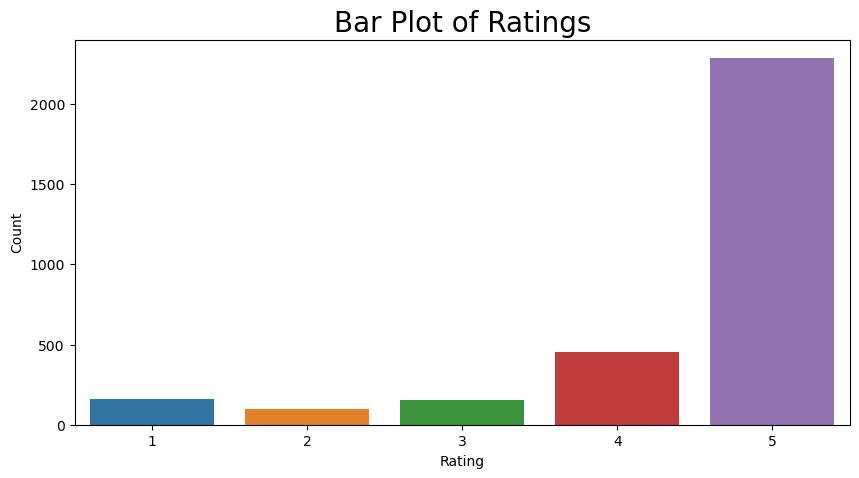

In [12]:
# visualization

# value counts of rating
rating_label = df.rating.value_counts()
print(rating_label)
index=rating_label.index

# barplot
plt.figure(figsize=(10, 5))
sns.barplot(x=index, y=rating_label )
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Bar Plot of Ratings', fontsize=20)

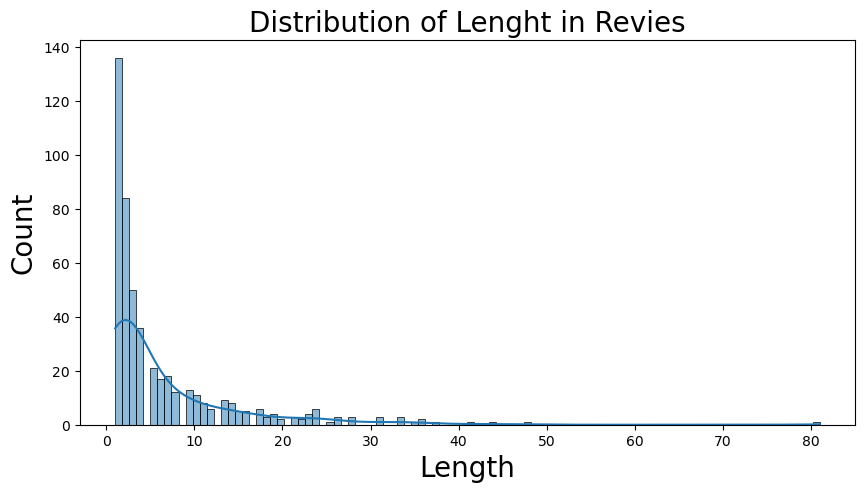

In [13]:
# histogram plot of len of reivews

len_label = df['len'].value_counts()
plt.figure(figsize=(10, 5))
sns.histplot(len_label, bins=100 ,kde=True);
plt.xlabel('Length', fontsize=20)
plt.ylabel('Count', fontsize=20);
plt.title('Distribution of Lenght in Revies', fontsize=20);

In [14]:
# Let's Check some of the reviews according to thier lengths
df[df.len == 1]['verified_reviews'].iloc[0]

'😍'

In [15]:
df[df['len'] == 150]['verified_reviews'].iloc[0]

"Got this on Amazon prime with the ring pro. Work really great. Being the lazy guy I am I don't need to go see who at my door anymore while I'm gaming."

In [16]:
df[df['len'] == 50]['verified_reviews'].iloc[0]

'Yet another Exho for our home and love them all!!!'

In [17]:
df[df['len'] == 25]['verified_reviews'].iloc[0]

'I love it, wife hates it.'

Text(0.5, 1.0, 'Length vs Ratings')

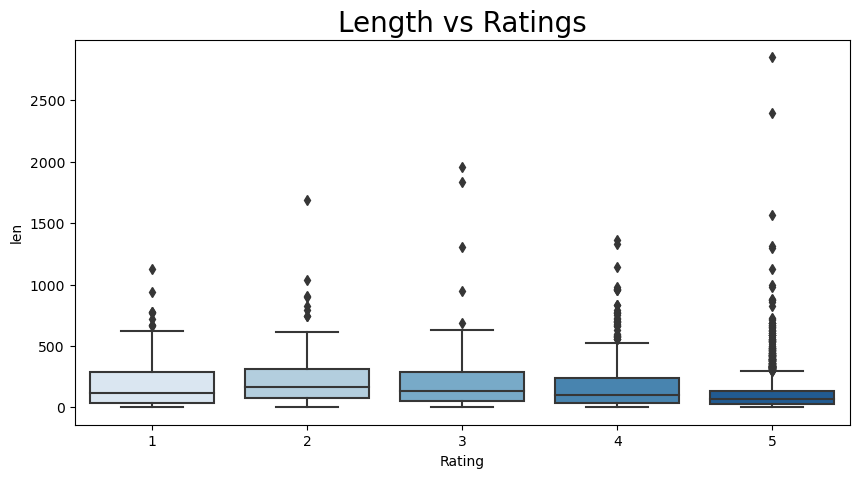

In [18]:
# box plot 

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['rating'],y= df['len'], palette = 'Blues')
plt.xlabel('Rating')
plt.ylabel('len')
plt.title('Length vs Ratings', fontsize=20)

Text(0.5, 1.0, 'Feedback vs Ratings')

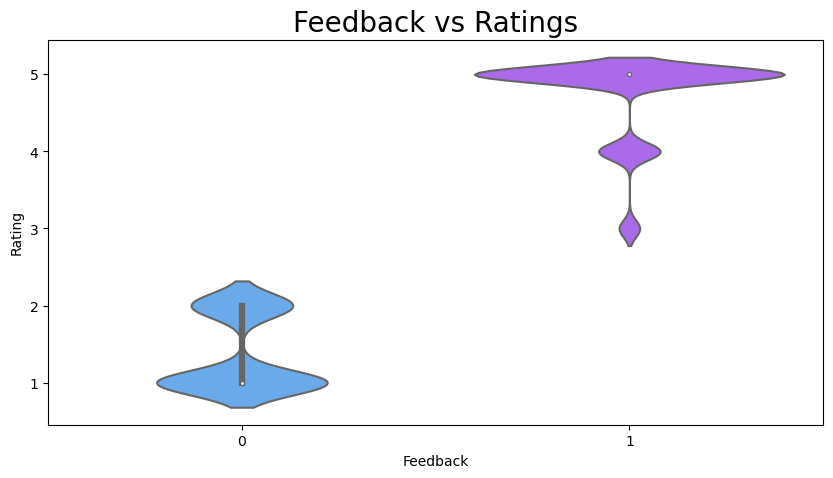

In [19]:
# violin plot
plt.figure(figsize=(10, 5))
sns.violinplot(x=df['feedback'],y= df['rating'], palette = 'cool')
plt.xlabel('Feedback')
plt.ylabel('Rating')
plt.title('Feedback vs Ratings', fontsize=20)

Text(0.5, 1.0, 'Variation vs Length of Ratings')

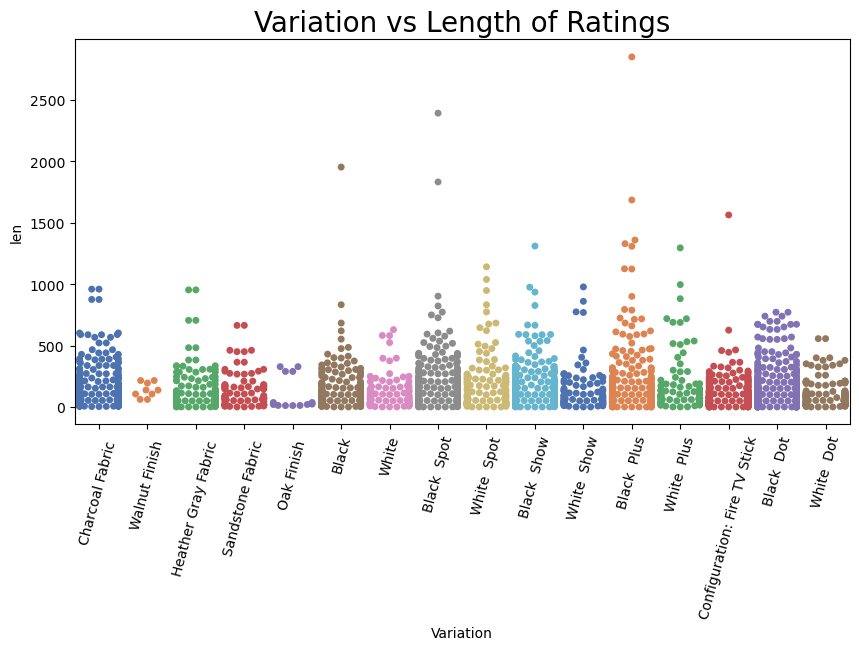

In [20]:
# swarmplot

plt.figure(figsize=(10, 5))
sns.swarmplot(x=df['variation'], y=df['len'], palette = 'deep')
plt.xlabel('Variation')
plt.ylabel('len')
plt.xticks(rotation = 75)
plt.title("Variation vs Length of Ratings", fontsize=20)


Text(0.5, 1.0, 'Variation vs Ratings')

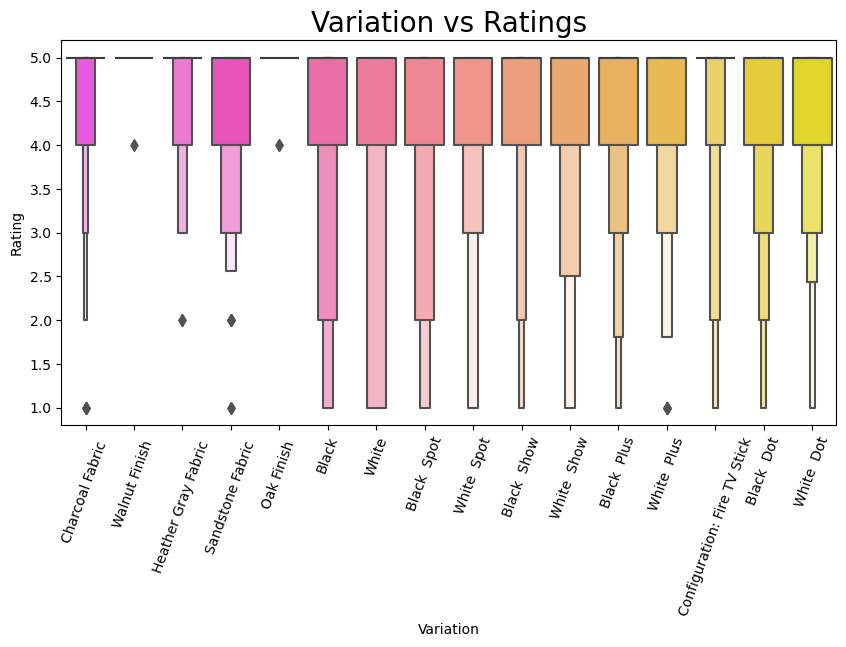

In [21]:
# bivariate analysis 

plt.figure(figsize=(10, 5))
sns.boxenplot(x=df['variation'], y=df['rating'], palette = 'spring')
plt.xlabel('Variation')
plt.ylabel('Rating')
plt.xticks(rotation = 70)
plt.title("Variation vs Ratings", fontsize=20)

In [22]:
# preprocessing of text 

# CountVectorrizer 
count_vector = CountVectorizer(stop_words='english') 

ws = count_vector.fit_transform(df.verified_reviews)
s_w = ws.sum(axis=0)
w_f = [(w, s_w[0, idx]) for w, idx in count_vector.vocabulary_.items()]
w_f = sorted(w_f, key = lambda x: x[1], reverse = True)

# creating dataframe
freq = pd.DataFrame(w_f, columns=['word', 'freq'])

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 50')

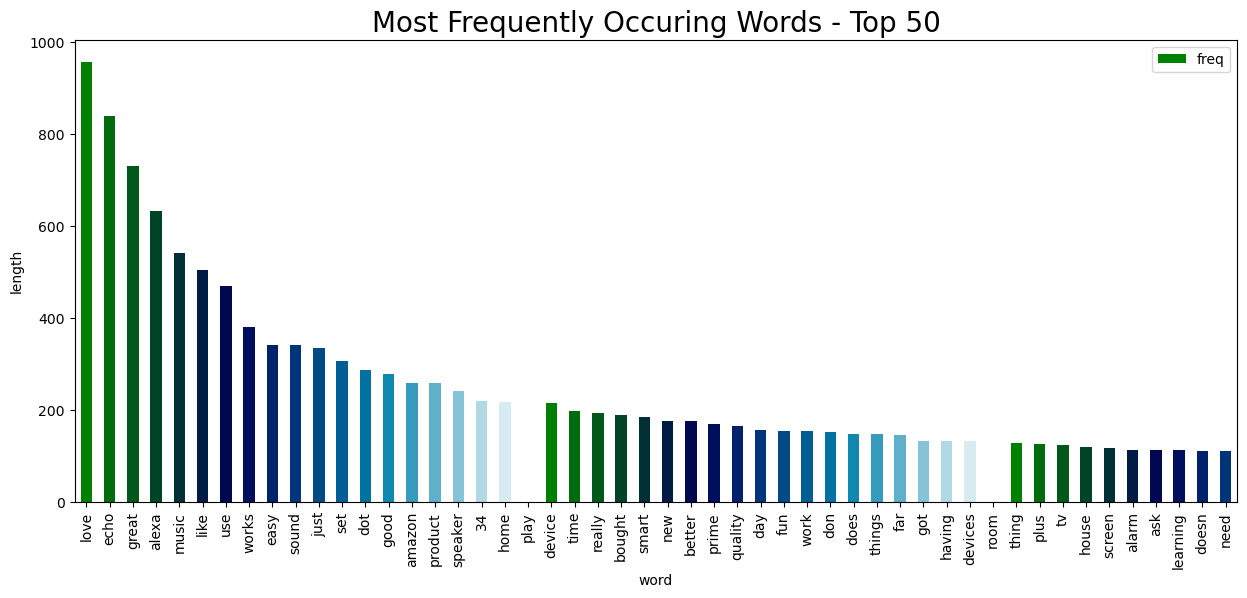

In [23]:
# barplot of top 50 frequently occuring words
color = plt.cm.ocean(np.linspace(0, 1, 20))
freq.head(50).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.xlabel('word')
plt.ylabel('length')
plt.title('Most Frequently Occuring Words - Top 50',fontsize=20)

Text(0.5, 1.0, 'Vocabulary from Reviews')

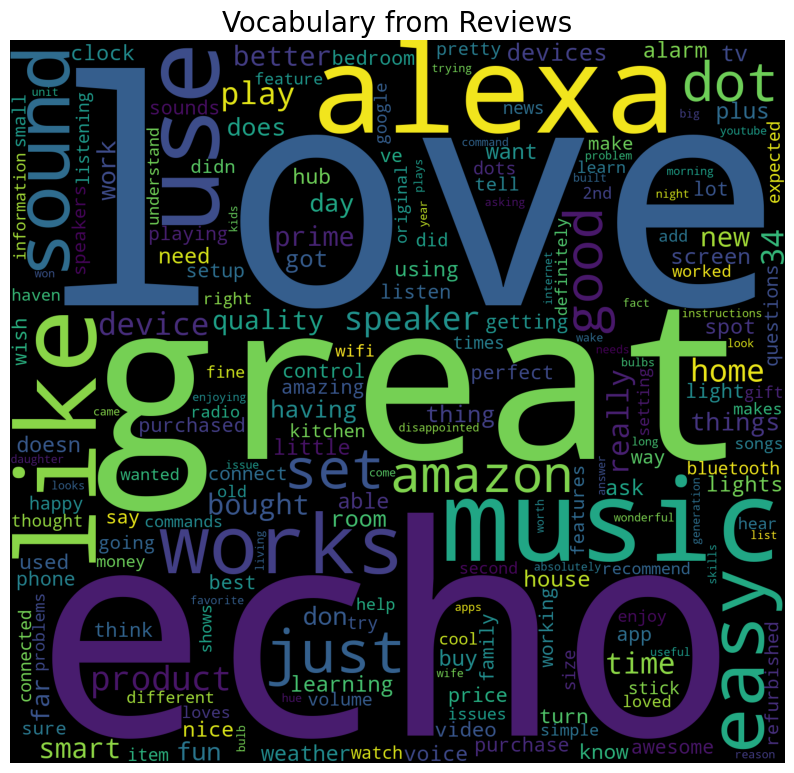

In [24]:
# representing words on WordCloud
word_cloud = WordCloud(background_color='black', width=1500, height=1400).generate_from_frequencies(dict(w_f))
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(word_cloud)
plt.title('Vocabulary from Reviews',fontsize=20)

In [25]:
# preproecessing
c = []

for i in range(0, 3150):
    # removing characters except a-z and A-Z
    r = re.sub('[^a-zA-Z]', ' ', df['verified_reviews'][i])
    # converting every word into lower word
    r = r.lower()
    # splitting text 
    r = r.split()
    # applying Stemming
    ps = PorterStemmer()
    # removing stopwords
    sw = stopwords.words('english')
    sw.remove('not')
    r = [ps.stem(word) for word in r if not word in set(sw)]
    r = ' '.join(r)
    c.append(r)

In [27]:
# count vectorizer
count_vector = CountVectorizer(max_features=2500) 

# independent and dependent variables
X = count_vector.fit_transform(c).toarray()
y = df.iloc[:, 4].values

# checking shape 
print(X.shape)
print(y.shape)

(3150, 2500)
(3150,)


In [28]:
# train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [29]:
print("shape of X_train: ", X_train.shape)
print("shape of X_test: ", X_test.shape)

shape of X_train:  (2362, 2500)
shape of X_test:  (788, 2500)


In [30]:
# Min Max Scaler 
min_max_sc = MinMaxScaler()

X_train = min_max_sc.fit_transform(X_train)
X_test = min_max_sc.transform(X_test)

Step 4: Create and Train the Random Forest Classifier Model

Create a Random Forest Classifier model using scikit-learn.

In [33]:
# Random Forest Classifier 
rf = RandomForestClassifier()

# fit on data 
rf.fit(X_train, y_train)

# prediction 
y_pred = rf.predict(X_test)


Step 6: Evaluate Model Performance

Assess the model's performance using evaluation metrics like Accuracy, Confusion Matrix, Classification Report

In [36]:
# Accuracy Score
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy Score For The Model=',accuracy)

Accuracy Score For The Model= 0.9352791878172588


In [37]:
# Classification Report
report=classification_report(y_test,y_pred)
print('Classification Report',report)

Classification Report               precision    recall  f1-score   support

           0       0.81      0.40      0.53        73
           1       0.94      0.99      0.97       715

    accuracy                           0.94       788
   macro avg       0.87      0.69      0.75       788
weighted avg       0.93      0.94      0.93       788



Text(0.5, 1.0, 'Confusion Matrix')

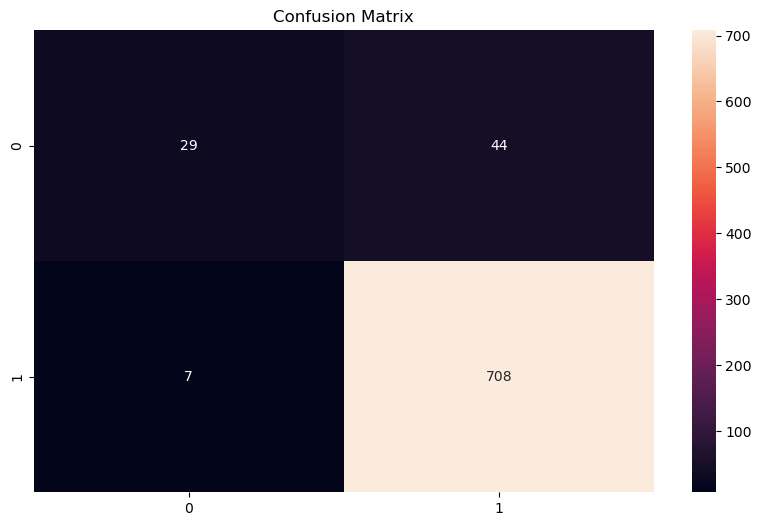

In [38]:
# confusion matrix 
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
plt.title('Confusion Matrix')

Step 7: HyperParameter Tunning

Hyperparameter tuning is the process of finding the best combination of hyperparameters for a machine learning model to optimize its performance.

In [39]:
# Hyperparameter Tunning

p = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}

# Grid Search CV 
grid_cv = GridSearchCV(estimator=rf, param_grid=p, cv=10, verbose=0, scoring='accuracy', n_jobs=-1, 
                       return_train_score=True)
grid_cv.fit(X_train, y_train.ravel())

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True, scoring='accuracy')

In [41]:
print("Best Parameter : {}".format(grid_cv.best_params_))

Best Parameter : {'bootstrap': True, 'max_depth': 80, 'min_samples_split': 8, 'n_estimators': 300}


In [42]:
rf_cv = RandomForestClassifier(bootstrap=True, max_depth=80, min_samples_split=8, n_estimators=300)

# fit on data 
rf_cv.fit(X_train, y_train)

# prediction 
pred = rf_cv.predict(X_test)

In [43]:
# Accuracy Score
accuracy=accuracy_score(y_test,pred)
print('Accuracy Score For The Model=',accuracy)

Accuracy Score For The Model= 0.9225888324873096


In [44]:
# Classification Report
report=classification_report(y_test,pred)
print('Classification Report',report)

Classification Report               precision    recall  f1-score   support

           0       0.93      0.18      0.30        73
           1       0.92      1.00      0.96       715

    accuracy                           0.92       788
   macro avg       0.93      0.59      0.63       788
weighted avg       0.92      0.92      0.90       788



Text(0.5, 1.0, 'Confusion Matrix')

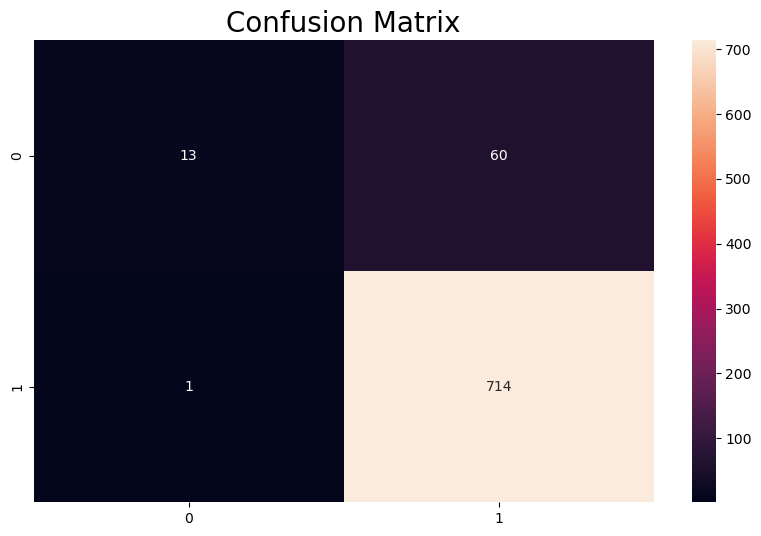

In [45]:
# confusion matrix 
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g')
plt.title('Confusion Matrix', fontsize=20)